## Import Needed Libraries

In [293]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot 
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from imblearn.over_sampling import RandomOverSampler # Improve performance accuracy 
from imblearn.under_sampling import RandomUnderSampler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score , recall_score ,f1_score
from sklearn.metrics import classification_report
matplotlib.pyplot.style.use('fivethirtyeight')
#plt.style.use('fivethertyeight')
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [294]:
data = pd.read_csv('diabetes.csv')

## Explor Data

In [295]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [296]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [297]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [298]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [299]:
data.duplicated().sum()

0

## Analysis

In [300]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

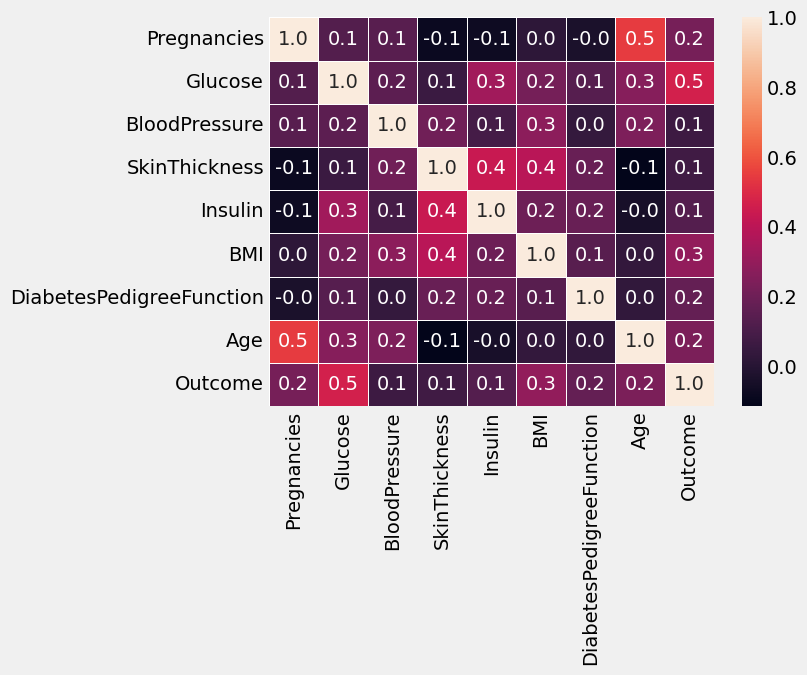

In [301]:
sns.heatmap(data.corr(),annot=True,fmt='0.1f',linewidth=.5)

<Axes: xlabel='Outcome', ylabel='count'>

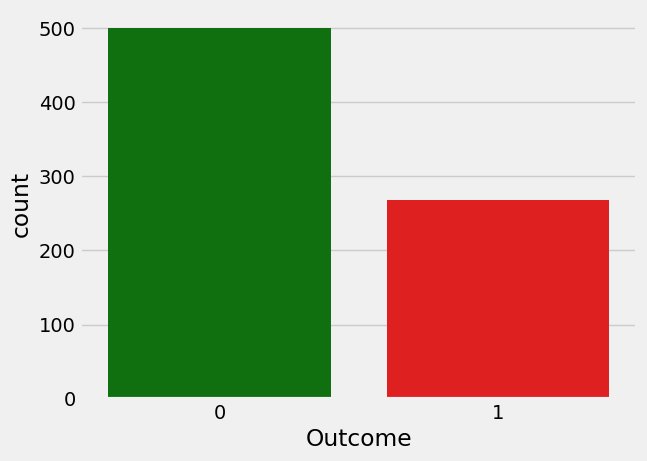

In [302]:
sns.countplot(x='Outcome' , data=data , palette=['g','r'])

In [303]:
max = data[data['Outcome']==0]
min = data[data['Outcome']==1]
max.shape , min.shape

((500, 9), (268, 9))

In [304]:
import matplotlib.pyplot as plt

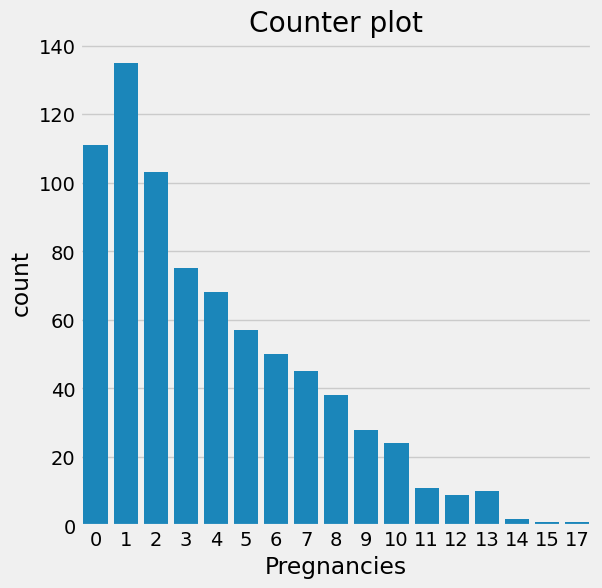

In [305]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title('Counter plot')
sns.countplot(x= 'Pregnancies' , data=data)
plt.show()

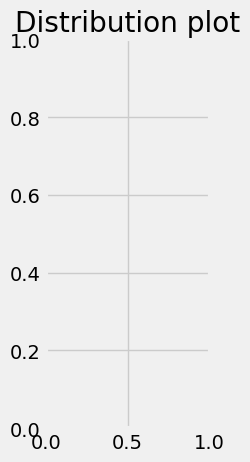

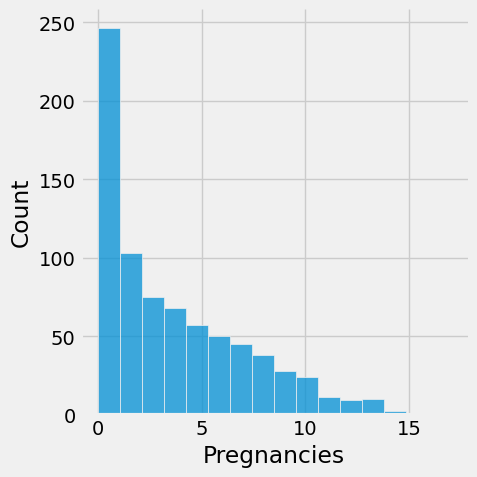

In [306]:
plt.subplot(1,3,2)
plt.title('Distribution plot')
sns.displot(data['Pregnancies'])

plt.show()

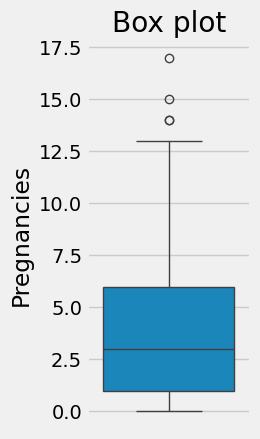

In [307]:
plt.subplot(1,3,3)
plt.title('Box plot')
sns.boxplot(y=data['Pregnancies'])
plt.show()

<Axes: ylabel='Age'>

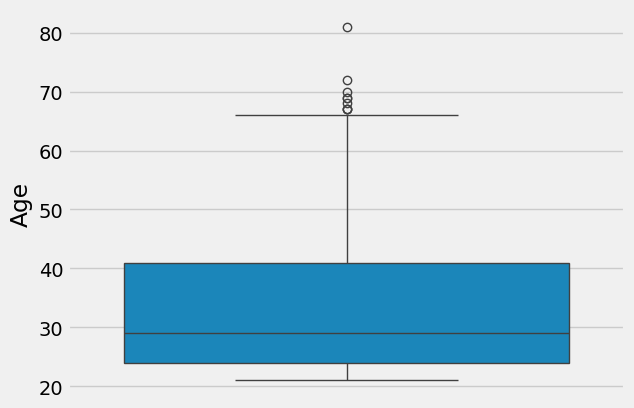

In [308]:
sns.boxplot(data.Age)

## Create Model

## Split data into train & test data

In [309]:
x = data.drop('Outcome' , axis=1)
y = data['Outcome']

In [310]:
rm = RandomOverSampler(random_state=41)
x_res,y_res = rm.fit_resample(x,y)

In [312]:
print('old data set shape{}' .format(Counter(y)))
print('old data set shape{}' .format(Counter(y_res)))

old data set shapeCounter({0: 500, 1: 268})
old data set shapeCounter({1: 500, 0: 500})


In [313]:

x_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size = 0.2, random_state=41)

In [314]:
model_1 = LogisticRegression()
model_2 = SVC()
model_3 = RandomForestClassifier(n_estimators=100 , class_weight='balanced')
model_4 = GradientBoostingClassifier(n_estimators=1000)

In [315]:
culumns=['LogisticRegression' , 'SVC' , 'RandomForestClassifier' , 'GradientBoostingClassifier' ]
result1=[]
result2=[]
result3=[]

# functions to make all oprations 

LogisticRegression()
accuracy is :  0.74
recall is :  0.78125
f1 is :  0.7425742574257426


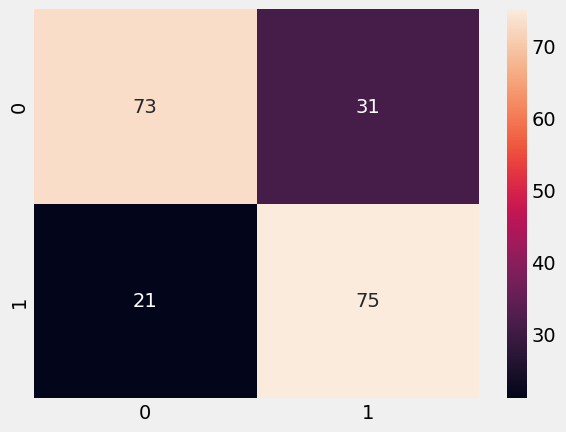

In [316]:
def cal(model):
    model.fit(x_train,y_train)
    per = model.predict(X_test)
    accuracy = accuracy_score(per,y_test)
    recall = recall_score(per,y_test)
    f1 = f1_score(per,y_test)
    
    result1.append(accuracy)
    result2.append(recall)
    result3.append(f1)
    
    sns.heatmap(confusion_matrix(per,y_test) , annot=True)
    print(model)
    print('accuracy is : ' , accuracy)
    print('recall is : ' , recall)
    print('f1 is : ' , f1)
    
cal(model_1)

SVC()
accuracy is :  0.69
recall is :  0.7291666666666666
f1 is :  0.693069306930693


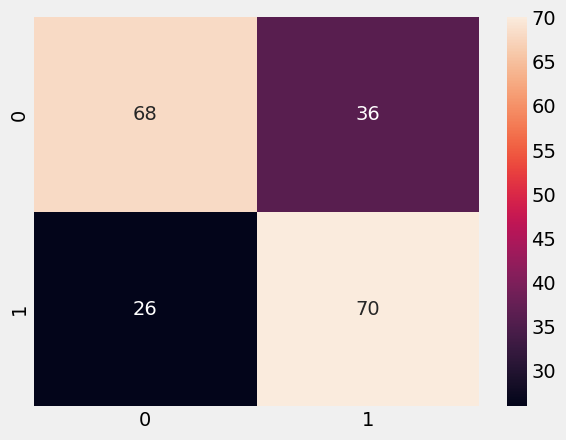

In [317]:
cal(model_2)

RandomForestClassifier(class_weight='balanced')
accuracy is :  0.87
recall is :  0.8508771929824561
f1 is :  0.8818181818181818


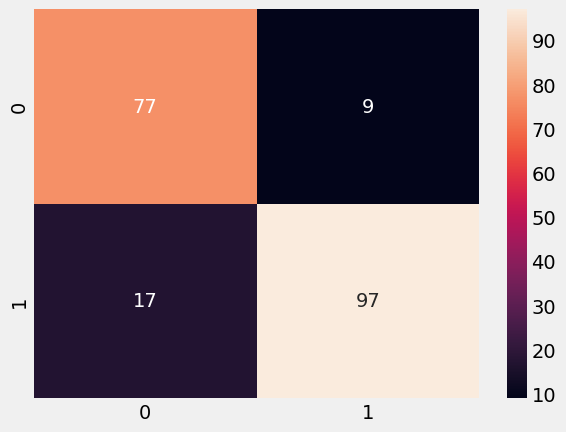

In [318]:
cal(model_3)

GradientBoostingClassifier(n_estimators=1000)
accuracy is :  0.85
recall is :  0.8392857142857143
f1 is :  0.8623853211009174


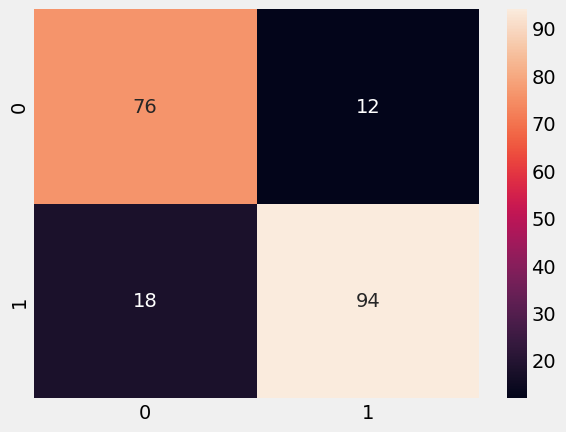

In [319]:
cal(model_4)

In [320]:
result1

[0.74, 0.69, 0.87, 0.85]

In [321]:
result2

[0.78125, 0.7291666666666666, 0.8508771929824561, 0.8392857142857143]

In [322]:
result3

[0.7425742574257426, 0.693069306930693, 0.8818181818181818, 0.8623853211009174]

In [323]:
finlresult= pd.DataFrame({'Algorithm' : culumns , 'Accuracy' : result1 , 'Recall' : result2 , 'FScore' : result3})

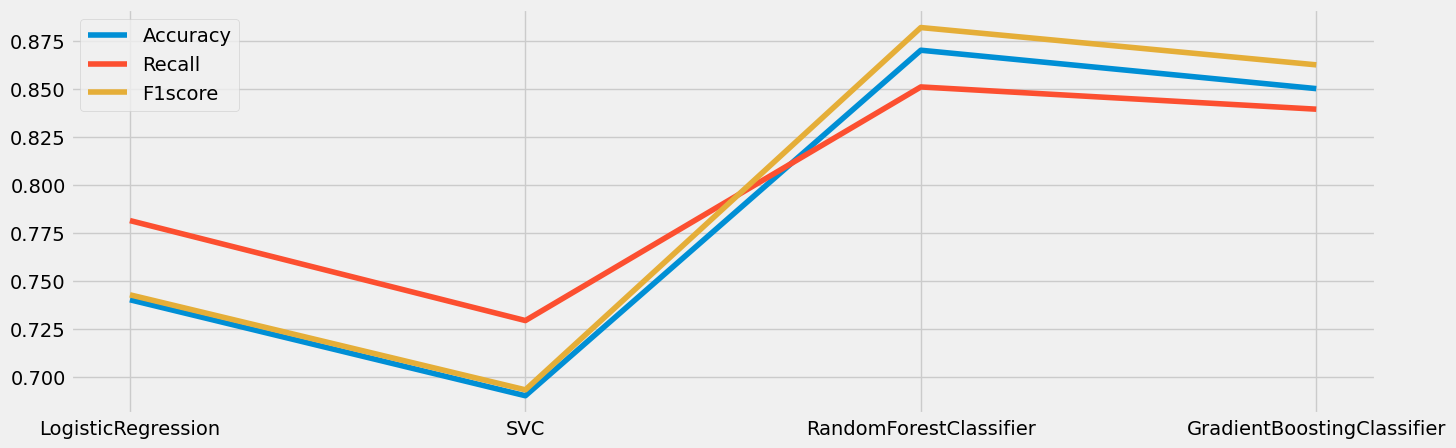

In [324]:
plt.figure(figsize=(15, 5))
plt.plot(finlresult.Algorithm,result1,label = 'Accuracy')
plt.plot(finlresult.Algorithm,result2,label = 'Recall')
plt.plot(finlresult.Algorithm,result3,label = 'F1score')
plt.legend()
plt.show()